# Assignment 1

## Importing libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import importlib
from Utils.Funcs import *
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## Question 2 Part 1

In [65]:
X_train = pd.read_csv("Data/X_train.csv", header = None).values
X_test = pd.read_csv("Data/X_test.csv", header = None).values
Y_train = pd.read_csv("Data/Y_train.csv", header = None).values
Y_test = pd.read_csv("Data/Y_test.csv", header = None).values

In [66]:
Trials = 5000
n, k = X_train.shape
df_lam = []
weights = []
X_train_svd_u, X_train_svd_s, X_train_svd_v  = np.linalg.svd(X_train)

### Experimenting with Lambda

In [67]:
for i in range(1,Trials):
    weights.append(ridge_reg(X = X_train, y = Y_train, lam = i))
    df_lam.append(df_lambda(lam = i, s = X_train_svd_s))

In [68]:
weights = np.array(weights).reshape(4999,7)
df_lam = np.array(df_lam)
combined = pd.DataFrame(data = weights, index=np.arange(1, 5000), columns=np.arange(1, 8)).join(
    pd.DataFrame(df_lam, columns = ["df_lambda"]))

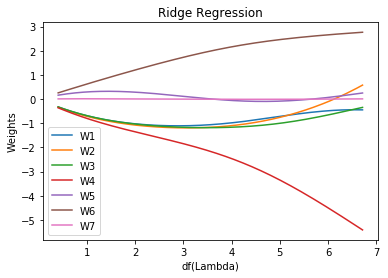

In [69]:
for i in range(1,8):
    plt.plot(combined["df_lambda"], combined[i], label = "W"+str(i))
plt.xlabel("df(Lambda)")
plt.ylabel("Weights")
plt.title("Ridge Regression")
plt.legend()
plt.show()

The chart above shows $ W_i $ as a function of $ df(\lambda) $. We can see that as $ \lambda $ increases, $df(\lambda) $ falls and the weights gets pulled closer to 0 due to the penatly term.

### Prediction

In [70]:
RMSE = []
Lambda = []
for i in range(51):
    Y_i, RMSE_i = predict(X = X_train, y = Y_train, lam = i, X_test = X_test, Y_test = Y_test)
    RMSE.append(RMSE_i)
    Lambda.append(i)

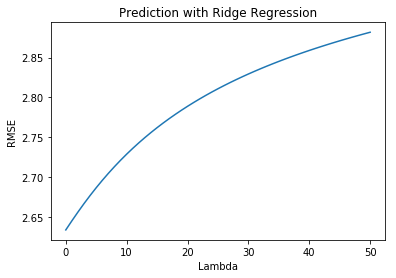

In [71]:
plt.plot(Lambda, RMSE)
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.title("Prediction with Ridge Regression")
plt.show()

The graph above shows that with OLS and the possibility of underfitting, increasing the $\lambda$ term only hurts prediction accuracy.

## Question 2 Part 2

### Polynomials

In [72]:
RMSE_1 = []
RMSE_2 = []
RMSE_3 = []
Lambda = []
for i in range(500):
    
    Y_i, RMSE_i = predict(X = poly_mat(X_train, 1), y = Y_train, lam = i, X_test = poly_mat(X_test, 1), Y_test = Y_test)
    RMSE_1.append(RMSE_i)
    
    Y_i, RMSE_i = predict(X = poly_mat(X_train, 2), y = Y_train, lam = i, X_test = poly_mat(X_test, 2), Y_test = Y_test)
    RMSE_2.append(RMSE_i)
    
    Y_i, RMSE_i = predict(X = poly_mat(X_train, 3), y = Y_train, lam = i, X_test = poly_mat(X_test, 3), Y_test = Y_test)
    RMSE_3.append(RMSE_i)
    
    Lambda.append(i)

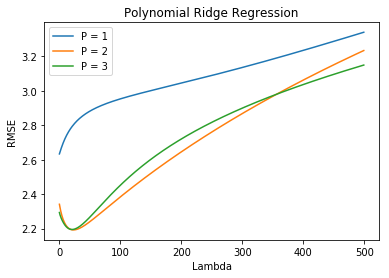

In [73]:
plt.plot(Lambda, RMSE_1, label = "P = 1")
plt.plot(Lambda, RMSE_2, label = "P = 2")
plt.plot(Lambda, RMSE_3, label = "P = 3")
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.title("Polynomial Ridge Regression")
plt.legend()
plt.show()

The above graph shows that when using polynomial models that may overfit, ridge regression does work in regularization and avoidance of overfitting.

## Comparing with scikit-learn

Below I will repoduce the results but using the popular ML library sci-kit learn

In [74]:
W = []
for i in range(5000):
    model = Ridge(alpha = i)
    model.fit(X_train, Y_train)
    W.append(model.coef_)

In [78]:
W = np.array(W)
W = W.reshape((5000, 7))
combined_sk = pd.DataFrame(data = W, index=np.arange(0, 5000), columns=np.arange(1, 8)).join(
    pd.DataFrame(df_lam, columns = ["df_lambda"]))

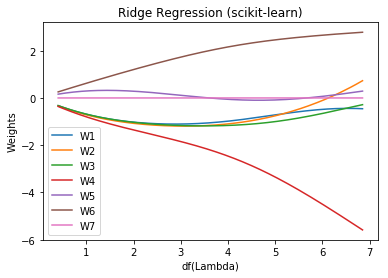

In [81]:
for i in range(1,8):
    plt.plot(combined_sk["df_lambda"], combined_sk[i], label = "W"+str(i))
plt.xlabel("df(Lambda)")
plt.ylabel("Weights")
plt.title("Ridge Regression (scikit-learn)")
plt.legend()
plt.show()

In [82]:
RMSE_sk = []
Lambda_sk = []
for i in range(50):
    model = Ridge(i)
    model.fit(X_train, Y_train)
    y_hat = model.predict(X_test)
    RMSE_sk.append(np.sqrt(mean_squared_error(Y_test, y_hat)))
    Lambda_sk.append(i)

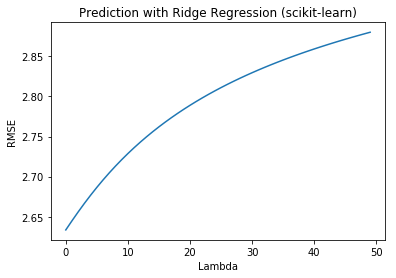

In [83]:
plt.plot(Lambda_sk, RMSE_sk)
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.title("Prediction with Ridge Regression (scikit-learn)")
plt.show()

In [84]:
RMSE_sk1 = []
RMSE_sk2 = []
RMSE_sk3 = []
Lambda_sk = []
for i in range(500):
    
    model = Ridge(i)
    model.fit(X = poly_mat(X_train, 1), y = Y_train)
    y_hat = model.predict(X = poly_mat(X_test, 1))
    RMSE_sk1.append(np.sqrt(mean_squared_error(Y_test, y_hat)))
    
    model = Ridge(i)
    model.fit(X = poly_mat(X_train, 2), y = Y_train)
    y_hat = model.predict(X = poly_mat(X_test, 2))
    RMSE_sk2.append(np.sqrt(mean_squared_error(Y_test, y_hat)))
    
    model = Ridge(i)
    model.fit(X = poly_mat(X_train, 3), y = Y_train)
    y_hat = model.predict(X = poly_mat(X_test, 3))
    RMSE_sk3.append(np.sqrt(mean_squared_error(Y_test, y_hat)))
    
    Lambda_sk.append(i)

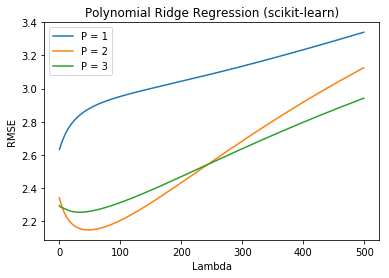

In [85]:
plt.plot(Lambda_sk, RMSE_sk1, label = "P = 1")
plt.plot(Lambda_sk, RMSE_sk2, label = "P = 2")
plt.plot(Lambda_sk, RMSE_sk3, label = "P = 3")
plt.xlabel("Lambda")
plt.ylabel("RMSE")
plt.title("Polynomial Ridge Regression (scikit-learn)")
plt.legend()
plt.show()

All of the algorithms coded from scratch have been reproduced using scikit-learn. The only point of divergence is the RMSE for p = 3 rr which looks different when using the sklearn version vs my implementation. 